In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import joblib

Učitavanje podataka i preprocesiranje su isti kao i u prethodnim datotekama.

In [2]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, names=['Sentiment', 'Tweet ID', 'Date', 'Query', 'Username', 'Tweet'])

In [3]:
def Sentiment_remap(x):
    if x == 0:
        return 0
    else:
        return 1

In [4]:
data['Sentiment'] = data['Sentiment'].apply(Sentiment_remap)

In [5]:
x = data['Tweet']
y = data['Sentiment']

In [6]:
tweet_count_vectorizer = CountVectorizer()

In [21]:
from sklearn.model_selection import GridSearchCV

Parametri koji će se koristiti u unakrsnoj validaciji.

In [22]:
params_grid = {'C' : [0.5, 2, 5]
              ,'kernel' : ['poly', 'rbf', 'sigmoid']}

In [23]:
gs = GridSearchCV(SVC(), param_grid=params_grid, cv=3,scoring='accuracy')

Zbog vremenski predugačkog obučavanja uzima se samo mali deo skupa podataka.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.01, test_size=0.004, stratify=y, random_state=42)


In [25]:
tweet_count_vectorizer.fit(X_train)

CountVectorizer()

In [26]:
X_train_vectorized = tweet_count_vectorizer.transform(X_train)
X_test_vectorized = tweet_count_vectorizer.transform(X_test)

In [27]:
gs.fit(X_train_vectorized, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.5, 2, 5],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [28]:
gs.best_params_  #najbolji izbor hiperparametara za naš model

{'C': 2, 'kernel': 'rbf'}

In [29]:
gs.best_estimator_

SVC(C=2)

In [30]:
gs.best_score_

0.7513752207000751

In [31]:
best_model = gs.best_estimator_ #kreiranje najboljeg modela

In [32]:
joblib.dump(best_model, 'svm_kernel_model.pkl')

['svm_kernel_model.pkl']

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
y_pred = best_model.predict(X_test_vectorized)

In [35]:
accuracy_score(y_test, y_pred)

0.76

In [7]:
svm_model = joblib.load('svm_kernel_model.pkl', mmap_mode=None)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.01, test_size=0.004, stratify=y, random_state=42)


In [9]:
tweet_count_vectorizer.fit(X_train)

CountVectorizer()

In [10]:
X_train_vectorized = tweet_count_vectorizer.transform(X_train)
X_test_vectorized = tweet_count_vectorizer.transform(X_test)

In [11]:
svm_model.fit(X_train_vectorized, y_train) #ubedljivo ima najsporije treniranje 

SVC(C=2)

In [13]:
y_pred = svm_model.predict(X_test_vectorized)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      3200
           1       0.76      0.77      0.76      3200

    accuracy                           0.76      6400
   macro avg       0.76      0.76      0.76      6400
weighted avg       0.76      0.76      0.76      6400



In [18]:
matrica_konfuzije = confusion_matrix(y_test, y_pred)

In [19]:
matrica_konfuzije

array([[2407,  793],
       [ 743, 2457]])

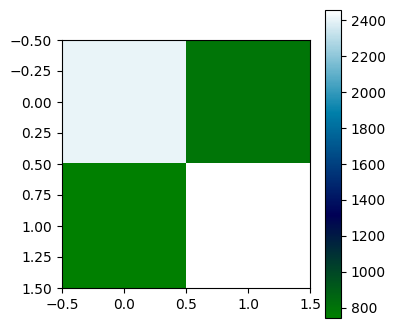

In [20]:
plt.figure(figsize=(4, 4))
plt.imshow(matrica_konfuzije, cmap='ocean')
plt.colorbar()
plt.show()

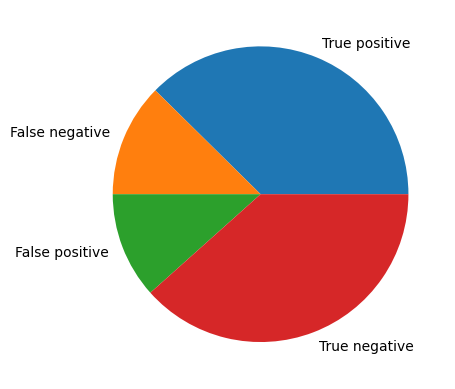

In [21]:
plt.pie(matrica_konfuzije.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show()